In [2]:
from importlib.machinery import SourceFileLoader

main = SourceFileLoader("main", "../src/main.py").load_module()

from main import *

In [3]:
import numpy as np

import pandas as pd

In [4]:
import matplotlib.pyplot as plt

import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.colors as colors

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

Initially we check that the transition matrix \(M^2\) is correct. We compare the payoff and cooperation for the
case,

**Payoffs**

In [5]:
c = np.random.randint(0, 1)
b = np.random.randint(1, 3)

for _ in range(1000):

    p1, p2, q1, q2 = np.random.random(4)

    one_bit_M = transition_matrix_one_bit(p=[p1, p2], q=[q1, q2])

    two_bit_M = transition_matrix(p=[p1, p2, p1, p2], q=[q1, q2, q1, q2], bits=4)

    ss_one_bit = invariant_distribution(one_bit_M)
    ss_two_bit = invariant_distribution(two_bit_M)

    assert np.isclose(
        ss_one_bit @ np.array([b - c, -c, b, 0]), ss_two_bit @ payoffs_vector(c, b)
    )

**Cooperation**

In [7]:
c = np.random.randint(0, 1)
b = np.random.randint(1, 3)

for _ in range(1000):

    p1, p2, q1, q2 = np.random.random(4)

    one_bit_M = transition_matrix_one_bit(p=[p1, p2], q=[q1, q2])

    two_bit_M = transition_matrix(p=[p1, p2, p1, p2], q=[q1, q2, q1, q2], bits=4)

    ss_one_bit = invariant_distribution(one_bit_M)
    ss_two_bit = invariant_distribution(two_bit_M)

    assert np.isclose(
        cooperation_rate(ss_one_bit, size=4), cooperation_rate(ss_two_bit, size=16)
    )

Secondly we check equations ... to ...., namely that:
    
$$\sum_{i, j \in \{C, D\}} u_{ij | CD} = \sum_{i, j \in \{C, D\}} u_{CD | ij}$$

In [8]:
c = np.random.randint(0, 1)
b = np.random.randint(1, 3)

np.random.seed(1)

for _ in range(1000):

    p1, p2, p3, p4 = np.random.random(4)
    q1, q2, q3, q4 = np.random.random(4)

    M = transition_matrix(p=[p1, p2, p3, p4], q=[q1, q2, q3, q4], bits=4)

    ss = invariant_distribution(M)
    
    assert np.isclose(
        sum([ss[i] for i in np.arange(0, 13, 4)]), sum([ss[i] for i in range(4)])
    )
    assert np.isclose(
    sum([ss[i] for i in np.arange(1, 14, 4)]), sum([ss[i] for i in range(4, 8)])
)
    assert np.isclose(
    sum([ss[i] for i in np.arange(2, 15, 4)]), sum([ss[i] for i in range(8, 12)])
)
    assert np.isclose(
    sum([ss[i] for i in np.arange(3, 16, 4)]), sum([ss[i] for i in range(12, 16)])
)

**Special Case**

The analysis was carried out in the mathematica notebook [here]().

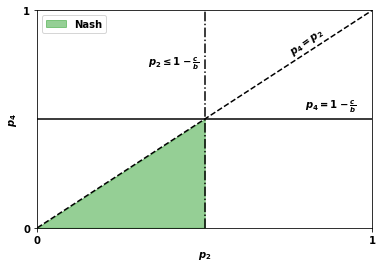

In [121]:
c, b = 2, 1

fig, ax = plt.subplots()

p2 = np.linspace(0, 1, 100)

p4 = [1 - (b / c) for _ in p2]

ax.plot(p2, p4, color='black');

ax.plot(p2, p2, "--" ,color='black');


ax.axvline(1 - (b / c),
           linestyle="-."
           , color="black")

ax.set_ylim(0, 1);
ax.set_yticks([0, 1])
ax.set_xticks([0, 1])
ax.set_xlim(0, 1);

ax.set_ylabel("$p_4$");
ax.set_xlabel("$p_2$");

ax.fill_between([0, 0.5], [0, 0.5], alpha=0.5, color='tab:green', label='Nash')


ax.annotate(r"$p_4 = 1 - \frac{c}{b}$", (0.80, 0.55));

ax.annotate(r"$p_2 \leq 1 - \frac{c}{b}$", (0.33, 0.75));

ax.annotate(r"$p_4 = p_2$", (0.75, 0.8), rotation=35);

ax.legend();

Evaluating Nash numerically.

In [86]:
columns = (["", "ID"] + [f'p{i+1}' for i in range(16)] + [f'q{i+1}' for i in range(16)] + 
           ['label', 'Sp', 'Sq', "condition A", "condition B",'c', 'b'])

In [116]:
df = pd.read_csv("../special_case_donation.csv", index_col=0)

In [122]:
def seperate_equilibria_and_non(df):
    per_player = df.groupby('ID')['condition A'].all()

    eq_players_ID = per_player[per_player == True].index

    noneq_players_ID = per_player[per_player == False].index
    
    return df[df['ID'].isin(eq_players_ID)], df[df['ID'].isin(noneq_players_ID)]

In [123]:
eq, noneq = seperate_equilibria_and_non(df)

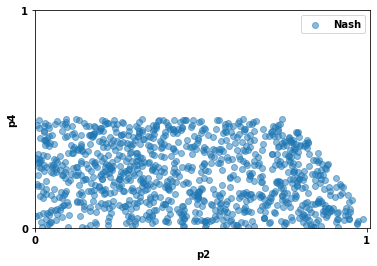

In [573]:
fig, ax = plt.subplots()

i = 0
for _, row in eq[['p2', 'p6',]].drop_duplicates().sample(n=1000, random_state=1).iterrows():
    if i == 0:
        ax.scatter(row['p2'], row['p6'], color='tab:blue', alpha=0.5, label='Nash')
    else:
        ax.scatter(row['p2'], row['p6'], color='tab:blue', alpha=0.5)
    i += 1

ax.set_ylim(0, 1);
ax.set_yticks([0, 1])
ax.set_xticks([0, 1])
ax.set_xlim(0, 1.01);
ax.set_xlabel('p2')
ax.set_ylabel('p4')

ax.legend();

fig.savefig("../static/special_case_numerical_nash.pdf")

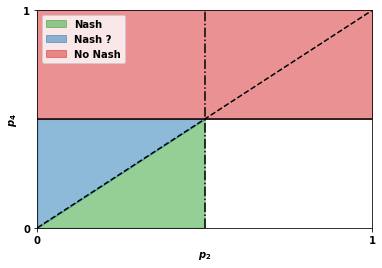

In [134]:
c, b = 2, 1

fig, ax = plt.subplots()

p2 = np.linspace(0, 1, 100)

p4 = [1 - (b / c) for _ in p2]

ax.plot(p2, p4, color='black');

ax.plot(p2, p2, "--" ,color='black');


ax.axvline(1 - (b / c),
           linestyle="-."
           , color="black")

ax.set_ylim(0, 1);
ax.set_yticks([0, 1])
ax.set_xticks([0, 1])
ax.set_xlim(0, 1);

ax.set_ylabel("$p_4$");
ax.set_xlabel("$p_2$");

ax.fill_between([0, 0.5], [0, 0.5], alpha=0.5, color='tab:green', label='Nash')
ax.fill_between([0, 0.5], [0, 0.5], [0.5, 0.5], alpha=0.5, color='tab:blue', label='Nash ?')
ax.fill_between([0, 1],  [1 - (b / c), 1 - (b / c)], [1, 1], alpha=0.5, color='tab:red', label='No Nash')


# ax.annotate(r"$p_4 = 1 - \frac{c}{b}$", (0.80, 0.55));

# ax.annotate(r"$p_2 \leq 1 - \frac{c}{b}$", (0.33, 0.75));

# ax.annotate(r"$p_4 = p_2$", (0.75, 0.8), rotation=35);

ax.legend();

**Sanity**

In [525]:
def condition_from_coeff_B(c, b):
    return 1 - (c / b)

def condition_from_coeff_D(p2):
    return p2

def condition_from_coeff_A(p2, c, b):
    return (b - c * (1 + p2)) / (b - c)

In [527]:
c, b = 1, 2
p2s = np.linspace(0, 1, 10)

condition1 = [condition_from_coeff_B(c, b) for _ in p2s]
condition2 = [condition_from_coeff_D(p2) for p2 in p2s]
condition4 = [condition_from_coeff_A(p2, c, b) for p2 in  p2s]

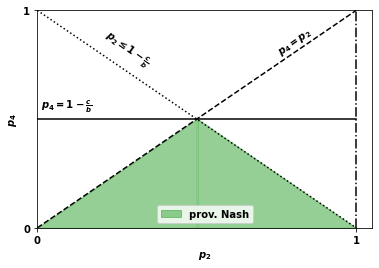

In [571]:
fig, ax = plt.subplots()

ax.plot(p2s, condition1, color='black');
ax.plot(p2s, condition2, linestyle="--", color='black', );
ax.axvline(1, linestyle="-.", color='black');
ax.plot(p2s, condition4,':', color='black');

ax.set_ylim(0, 1);
ax.set_yticks([0, 1])
ax.set_xticks([0, 1])
ax.set_xlim(0, 1.05);

ax.set_ylabel("$p_4$");
ax.set_xlabel("$p_2$");

ax.fill_between([0, 0.5], [0, 0.5], alpha=0.5, color='tab:green', label='prov. Nash')

ax.fill_between([0.503, 0.999], [0.5, 0.], alpha=0.5, color='tab:green')

ax.annotate(r"$p_4 = 1 - \frac{c}{b}$", (0.01, 0.55));

ax.annotate(r"$p_2 \leq 1 - \frac{c}{b}$", (0.2, 0.75), rotation=-35);

ax.annotate(r"$p_4 = p_2$", (0.75, 0.8), rotation=35);

ax.legend();

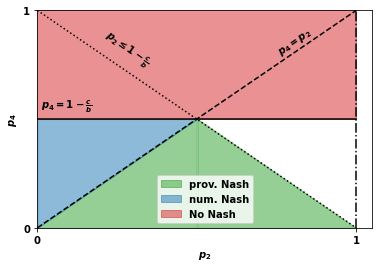

In [572]:
fig, ax = plt.subplots()

ax.plot(p2s, condition1, color='black');
ax.plot(p2s, condition2, linestyle="--", color='black', );
ax.axvline(1, linestyle="-.", color='black');
ax.plot(p2s, condition4,':', color='black');

ax.set_ylim(0, 1);
ax.set_yticks([0, 1])
ax.set_xticks([0, 1])
ax.set_xlim(0, 1.05);

ax.set_ylabel("$p_4$");
ax.set_xlabel("$p_2$");

ax.fill_between([0, 0.5], [0, 0.5], alpha=0.5, color='tab:green', label='prov. Nash')

ax.fill_between([0.503, 0.999], [0.5, 0.], alpha=0.5, color='tab:green')

ax.annotate(r"$p_4 = 1 - \frac{c}{b}$", (0.01, 0.55));

ax.annotate(r"$p_2 \leq 1 - \frac{c}{b}$", (0.2, 0.75), rotation=-35);

ax.annotate(r"$p_4 = p_2$", (0.75, 0.8), rotation=35);

ax.fill_between([0, 0.5], [0, 0.5], [0.5, 0.5], alpha=0.5, color='tab:blue', label='num. Nash')

ax.fill_between([0, 1],  [.5, .5], [1, 1], alpha=0.5, color='tab:red', label='No Nash')

ax.legend();

In [ ]:
fig, ax = plt.subplots()

ax.plot(p2s, condition1, color='black');
ax.plot(p2s, condition2, linestyle="--", color='black', );
ax.axvline(1, linestyle="-.", color='black');
ax.plot(p2s, condition4,':', color='black');

ax.set_ylim(0, 1);
ax.set_yticks([0, 1])
ax.set_xticks([0, 1])
ax.set_xlim(0, 1.05);

ax.set_ylabel("$p_4$");
ax.set_xlabel("$p_2$");

ax.fill_between([0, 0.5], [0, 0.5], alpha=0.5, color='tab:green', label='Nash')

ax.fill_between([0.503, 0.999], [0.5, 0.], alpha=0.5, color='tab:green')

ax.annotate(r"$p_4 = 1 - \frac{c}{b}$", (0.01, 0.55));

ax.annotate(r"$p_2 \leq 1 - \frac{c}{b}$", (0.2, 0.75), rotation=-35);

ax.annotate(r"$p_4 = p_2$", (0.75, 0.8), rotation=35);

ax.legend();

**Special case $p_2 = 1$**

In [138]:
import sympy as sym

In [148]:
p1, p2, p3, p4 = sym.symbols("p_1, p_2, p_3, p_4")

q1, q2, q3, q4 = sym.symbols("q_1, q_2, q_3, q_4")

c, b = sym.symbols("c, b")

In [467]:
N0 = [0, 0, 0, 0]

In [478]:
M = transition_matrix([1, p2, p3, 1], N0,
                      bits=4, analytical=True)

In [479]:
M.shape

(16, 16)

In [480]:
Sy = payoffs_vector_coplayer(b, c, dim=4)

In [481]:
ssN0 = invariant_distribution_analytically(M)
sy = ssN0 @ Sy

In [482]:
ssN0

Matrix([[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

In [477]:
sy[0].subs()

c*p_4**2 + c*p_4*(1 - p_4)

In [449]:
sum([ssN0[i] for i in np.arange(0, 16, 4)]).factor()

-(p_4 - 1)*(p_4 + 1)/(p_4**2 - 6*p_4 + 6)

In [450]:
sum([ssN0[i] for i in np.arange(1, 16, 4)]).factor()

(p_4**2 - 3*p_4 + 3)/(p_4**2 - 6*p_4 + 6)

In [451]:
sum([ssN0[i] for i in np.arange(2, 16, 4)]).factor()

(p_4 - 1)**2/(p_4**2 - 6*p_4 + 6)

In [452]:
sum([ssN0[i] for i in np.arange(3, 16, 4)]).factor()

-(p_4 - 1)/(p_4**2 - 6*p_4 + 6)

In [466]:
sy[0].factor().subs({p4:0})

-b/3 + 2*c/3

In [462]:
sym.fraction(sym.diff(sy[0].factor(), p4).factor())[0]

-2*b*p_4**2 + 4*b*p_4 + 3*c*p_4**2 - 8*c*p_4 + 6*c

In [427]:
player = [p1, p2, p3, p4]
opponent = [0, 0, 0, 0]

M = sym.Matrix(
        [
            [
                player[0] * opponent[0],
                player[0] * (1 - opponent[0]),
                opponent[0] * (1 - player[0]),
                (1 - player[0]) * (1 - opponent[0]),
            ],
            [
                opponent[2] * player[1],
                player[1] * (1 - opponent[2]),
                opponent[2] * (1 - player[1]),
                (1 - opponent[2]) * (1 - player[1]),
            ],
            [
                player[2] * opponent[1],
                player[2] * (1 - opponent[1]),
                opponent[1] * (1 - player[2]),
                (1 - player[2]) * (1 - opponent[1]),
            ],
            [
                player[3] * opponent[3],
                player[3] * (1 - opponent[3]),
                opponent[3] * (1 - player[3]),
                (1 - player[3]) * (1 - opponent[3]),
            ],
        ],
    )

In [428]:
ss = invariant_distribution_analytically(M)

In [429]:
ss

Matrix([[0.0, p_4/(-p_2 + p_4 + 1.0), 0.0, (1.0 - p_2)/(-p_2 + p_4 + 1.0)]])